## Model Selection using Bike Sharing (Assignment)

### Importing and Understanding Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Housing.csv
df = pd.read_csv("day.csv")

In [4]:
# Looking at the first five rows
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### From data dictionary, we can clearly check that we dont need casual, registered as their sum is equal to cnt. which means that predicting cnt is almost the same as predicting casual + registered

In [5]:
df.instant.value_counts()

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64

#### As observed in data dictionary, instant is record index. 
Let us drop attributes not required for linear regression

In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### If we observe cnt, windspeed, hum, temp, atemp - values seem to be gradually increasing
- indicates that there is no outliers

In [7]:
# summing up the missing values (column-wise)
#round(100*(df.isnull().sum()/len(df.index)), 2)
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing',ascending=False, inplace=True)
print(missing_value_df)

           column_name  percent_missing
instant        instant              0.0
dteday          dteday              0.0
season          season              0.0
yr                  yr              0.0
mnth              mnth              0.0
holiday        holiday              0.0
weekday        weekday              0.0
workingday  workingday              0.0
weathersit  weathersit              0.0
temp              temp              0.0
atemp            atemp              0.0
hum                hum              0.0
windspeed    windspeed              0.0
casual          casual              0.0
registered  registered              0.0
cnt                cnt              0.0


#### We do not observe any missing values

In [8]:
df=df.drop(['instant','casual','registered'],axis=1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Data Preparation

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


#### All are non nulls

#### Convert dteday in its right format of datetime for further use

In [10]:
from datetime import datetime
df['dteday']=pd.to_datetime(df["dteday"].apply(lambda x: datetime.strptime(x,'%d-%m-%Y'))) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      730 non-null    datetime64[ns]
 1   season      730 non-null    int64         
 2   yr          730 non-null    int64         
 3   mnth        730 non-null    int64         
 4   holiday     730 non-null    int64         
 5   weekday     730 non-null    int64         
 6   workingday  730 non-null    int64         
 7   weathersit  730 non-null    int64         
 8   temp        730 non-null    float64       
 9   atemp       730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(8)
memory usage: 74.3 KB


#### As we can observe from QQ plot, data seems to be normally distributed

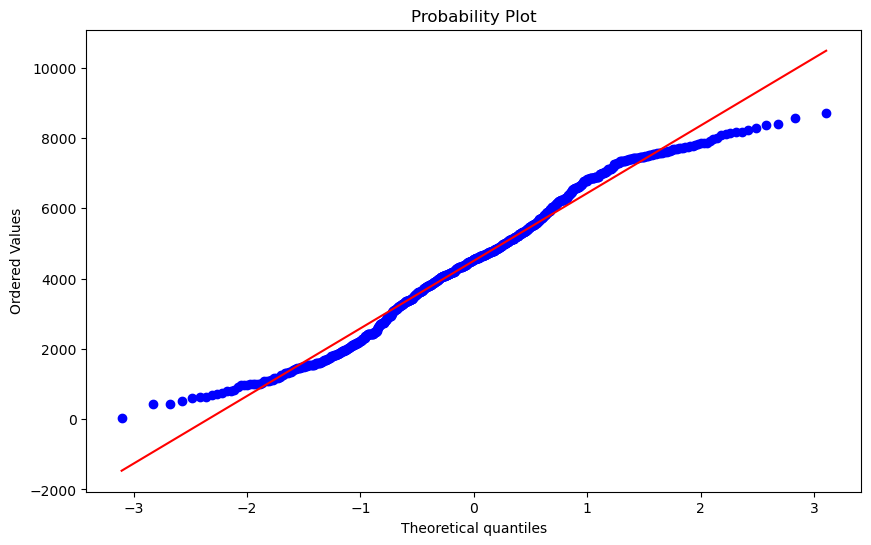

In [11]:
# Q Q plot
from scipy import stats
fig = plt.figure(figsize=(10, 6))
stats.probplot(df.cnt, dist='norm', plot=plt)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

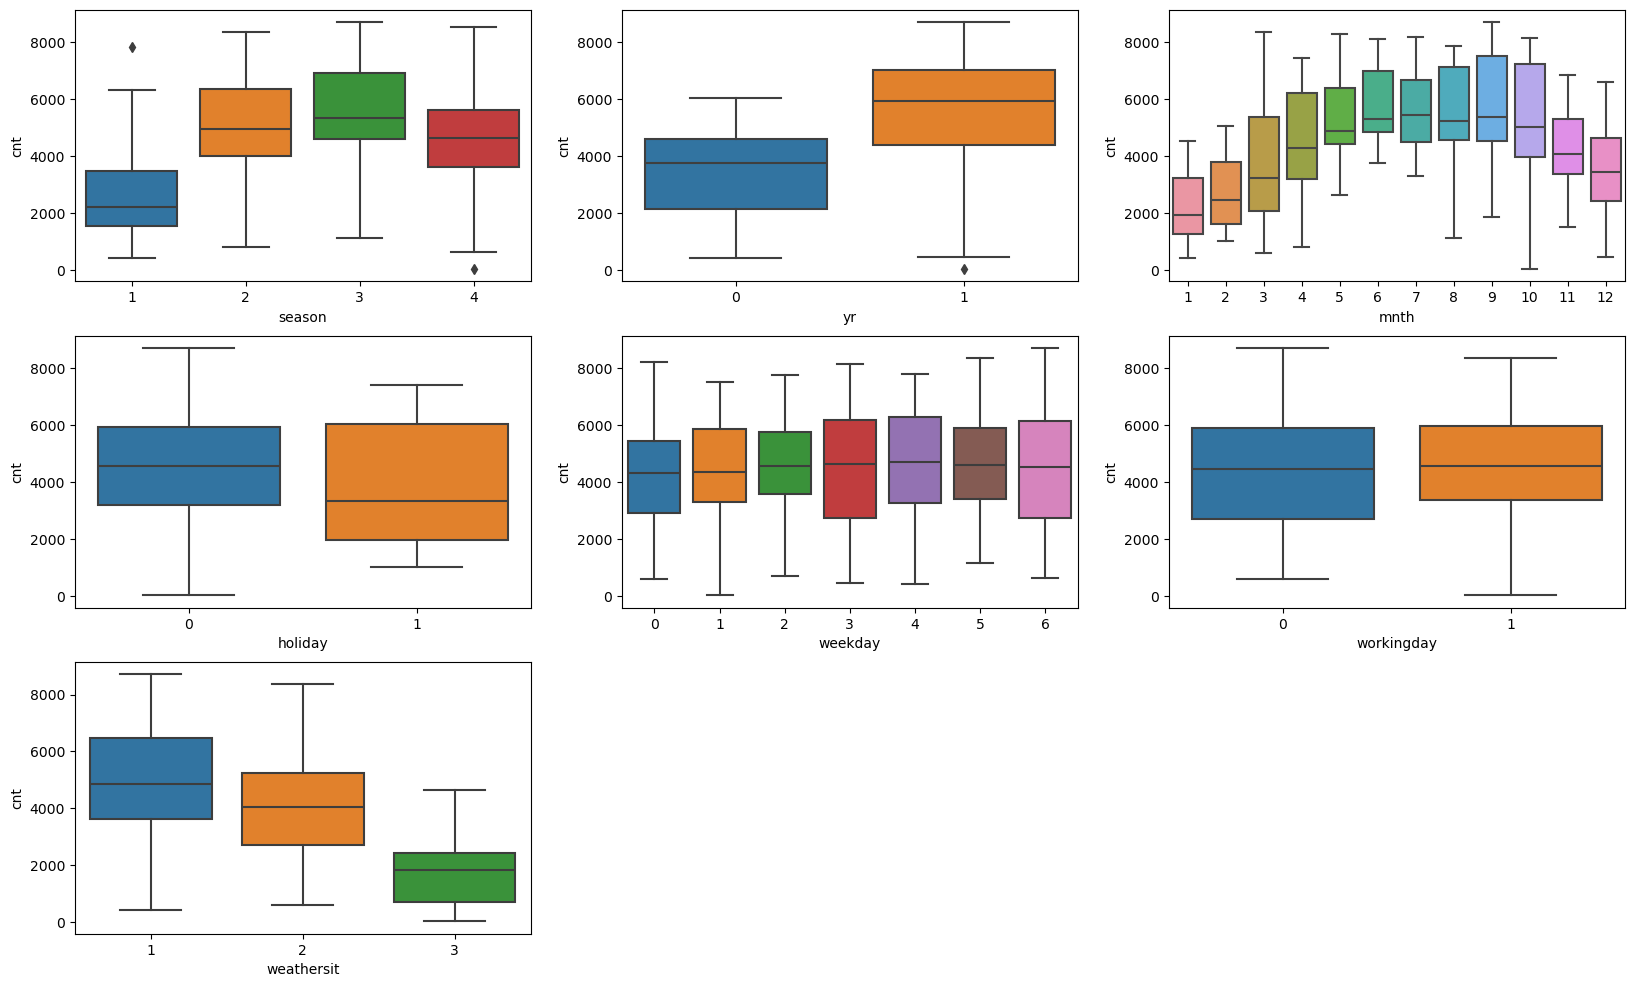

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

#### From data dictionary, we can check that weathersit needs to be split into separate attributes 

- You can see that your dataset has a column where values are 1,2,3,4. This needs to be converted to actual values first

- later, use get dummies to convert into 1 and 0s. But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [13]:
df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [14]:
# List of variables to map

varlist =  ['weathersit']

# Defining the map function
def binary_map(x):
    return x.map({1: "Weathersit_Clear", 2: "Weathersit_Mistcloud",3:"Weathersit_LightSnow",4:"Weathersit_Heavyrain"})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [15]:
df.weathersit.value_counts()

weathersit
Weathersit_Clear        463
Weathersit_Mistcloud    246
Weathersit_LightSnow     21
Name: count, dtype: int64

#### Convert into appropriate season columns 

In [16]:
# List of variables to map

varlist =  ['season']

# Defining the map function
def binary_map(x):
    return x.map({1: "Season_Spring", 2: "Season_Summer",3:"Season_Fall",4:"Season_Winter"})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [17]:
df.season.value_counts()

season
Season_Fall      188
Season_Summer    184
Season_Spring    180
Season_Winter    178
Name: count, dtype: int64

#### We will not use 'drop_first = True' as we drop the attributes later in the RFE selection, p value + VIF selection
- drop first = true helps in processing data faster as one attribute is less
- drop first = true also ensures that n-1 attributes explains all data
- however, for this model we will keep all attributes as r2 score drops when we drop first column of the attribute dummy value

In [18]:
# Let's drop the first column from status df (we will not use 'drop_first = True' as the model is given lesser r2 score with it)
status = pd.get_dummies(df['weathersit'])

# Add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud
0,2018-01-01,Season_Spring,0,1,0,6,0,Weathersit_Mistcloud,14.110847,18.18125,80.5833,10.749882,985,False,False,True
1,2018-01-02,Season_Spring,0,1,0,0,0,Weathersit_Mistcloud,14.902598,17.68695,69.6087,16.652113,801,False,False,True
2,2018-01-03,Season_Spring,0,1,0,1,1,Weathersit_Clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False
3,2018-01-04,Season_Spring,0,1,0,2,1,Weathersit_Clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False
4,2018-01-05,Season_Spring,0,1,0,3,1,Weathersit_Clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False


In [19]:

varlist =  ['Weathersit_Clear','Weathersit_LightSnow','Weathersit_Mistcloud']

# Defining the map function
def binary_map(x):
    return np.multiply(x,1)

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [20]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud
0,2018-01-01,Season_Spring,0,1,0,6,0,Weathersit_Mistcloud,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,2018-01-02,Season_Spring,0,1,0,0,0,Weathersit_Mistcloud,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,2018-01-03,Season_Spring,0,1,0,1,1,Weathersit_Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018-01-04,Season_Spring,0,1,0,2,1,Weathersit_Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018-01-05,Season_Spring,0,1,0,3,1,Weathersit_Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [21]:
# Drop 'sex' as we have created the dummies for it
df.drop(['weathersit'], axis = 1, inplace = True)

df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud
0,2018-01-01,Season_Spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1
1,2018-01-02,Season_Spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1
2,2018-01-03,Season_Spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,2018-01-04,Season_Spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,2018-01-05,Season_Spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [22]:
# Let's drop the first column from status df (we will not use 'drop_first = True' as the model is given lesser r2 score with it)
status = pd.get_dummies(df['season'])

# Add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2018-01-01,Season_Spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,False,True,False,False
1,2018-01-02,Season_Spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,False,True,False,False
2,2018-01-03,Season_Spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,False,True,False,False
3,2018-01-04,Season_Spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,False,True,False,False
4,2018-01-05,Season_Spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,False,True,False,False


In [23]:

varlist =  ['Season_Fall','Season_Spring','Season_Summer','Season_Winter']

# Defining the map function
def binary_map(x):
    return np.multiply(x,1)

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [24]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2018-01-01,Season_Spring,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0
1,2018-01-02,Season_Spring,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0
2,2018-01-03,Season_Spring,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0
3,2018-01-04,Season_Spring,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0
4,2018-01-05,Season_Spring,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0


In [25]:
df=df.drop('season',axis=1)
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Fall,Season_Spring,Season_Summer,Season_Winter
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0


#### Convert into appropriate weekday dummies

In [26]:
df.weekday.value_counts()

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64

#### recalculate weekday to be sure

In [27]:
df['weekday1']=df['dteday'].apply(lambda x: x.isoweekday())
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Fall,Season_Spring,Season_Summer,Season_Winter,weekday1
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,1
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,2
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,3
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,4
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,5


In [28]:
# List of variables to map

varlist =  ['weekday1']

# Defining the map function
def binary_map(x):
    return x.map({1: "Mon", 2: "Tue",3:"Wed",4:"Thu",5:"Fri",6:"Sat",7:"Sun"})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [29]:
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Fall,Season_Spring,Season_Summer,Season_Winter,weekday1
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,Mon
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,Tue
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,Wed
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,Thu
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,Fri


In [30]:
# Let's drop the first column from status df using 'drop_first = True'
status = pd.get_dummies(df['weekday1'])

# Add the results to the original housing dataframe
df = pd.concat([df, status], axis = 1)

# Now let's see the head of our dataframe.
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Season_Summer,Season_Winter,weekday1,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,...,0,0,Mon,False,True,False,False,False,False,False
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,Tue,False,False,False,False,False,True,False
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,Wed,False,False,False,False,False,False,True
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,...,0,0,Thu,False,False,False,False,True,False,False
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,...,0,0,Fri,True,False,False,False,False,False,False


In [31]:
varlist =  ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

# Defining the map function
def binary_map(x):
    return np.multiply(x,1)

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [32]:
df.head()

,dteday,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,...,Season_Summer,Season_Winter,weekday1,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,2018-01-01,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,...,0,0,Mon,0,1,0,0,0,0,0
1,2018-01-02,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,...,0,0,Tue,0,0,0,0,0,1,0
2,2018-01-03,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,...,0,0,Wed,0,0,0,0,0,0,1
3,2018-01-04,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,...,0,0,Thu,0,0,0,0,1,0,0
4,2018-01-05,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,...,0,0,Fri,1,0,0,0,0,0,0


In [33]:
df=df.drop(['dteday','weekday','weekday1'],axis=1)
df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,...,Season_Spring,Season_Summer,Season_Winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,0,...,1,0,0,0,1,0,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,...,1,0,0,0,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,1,0,0,0,0,0,0


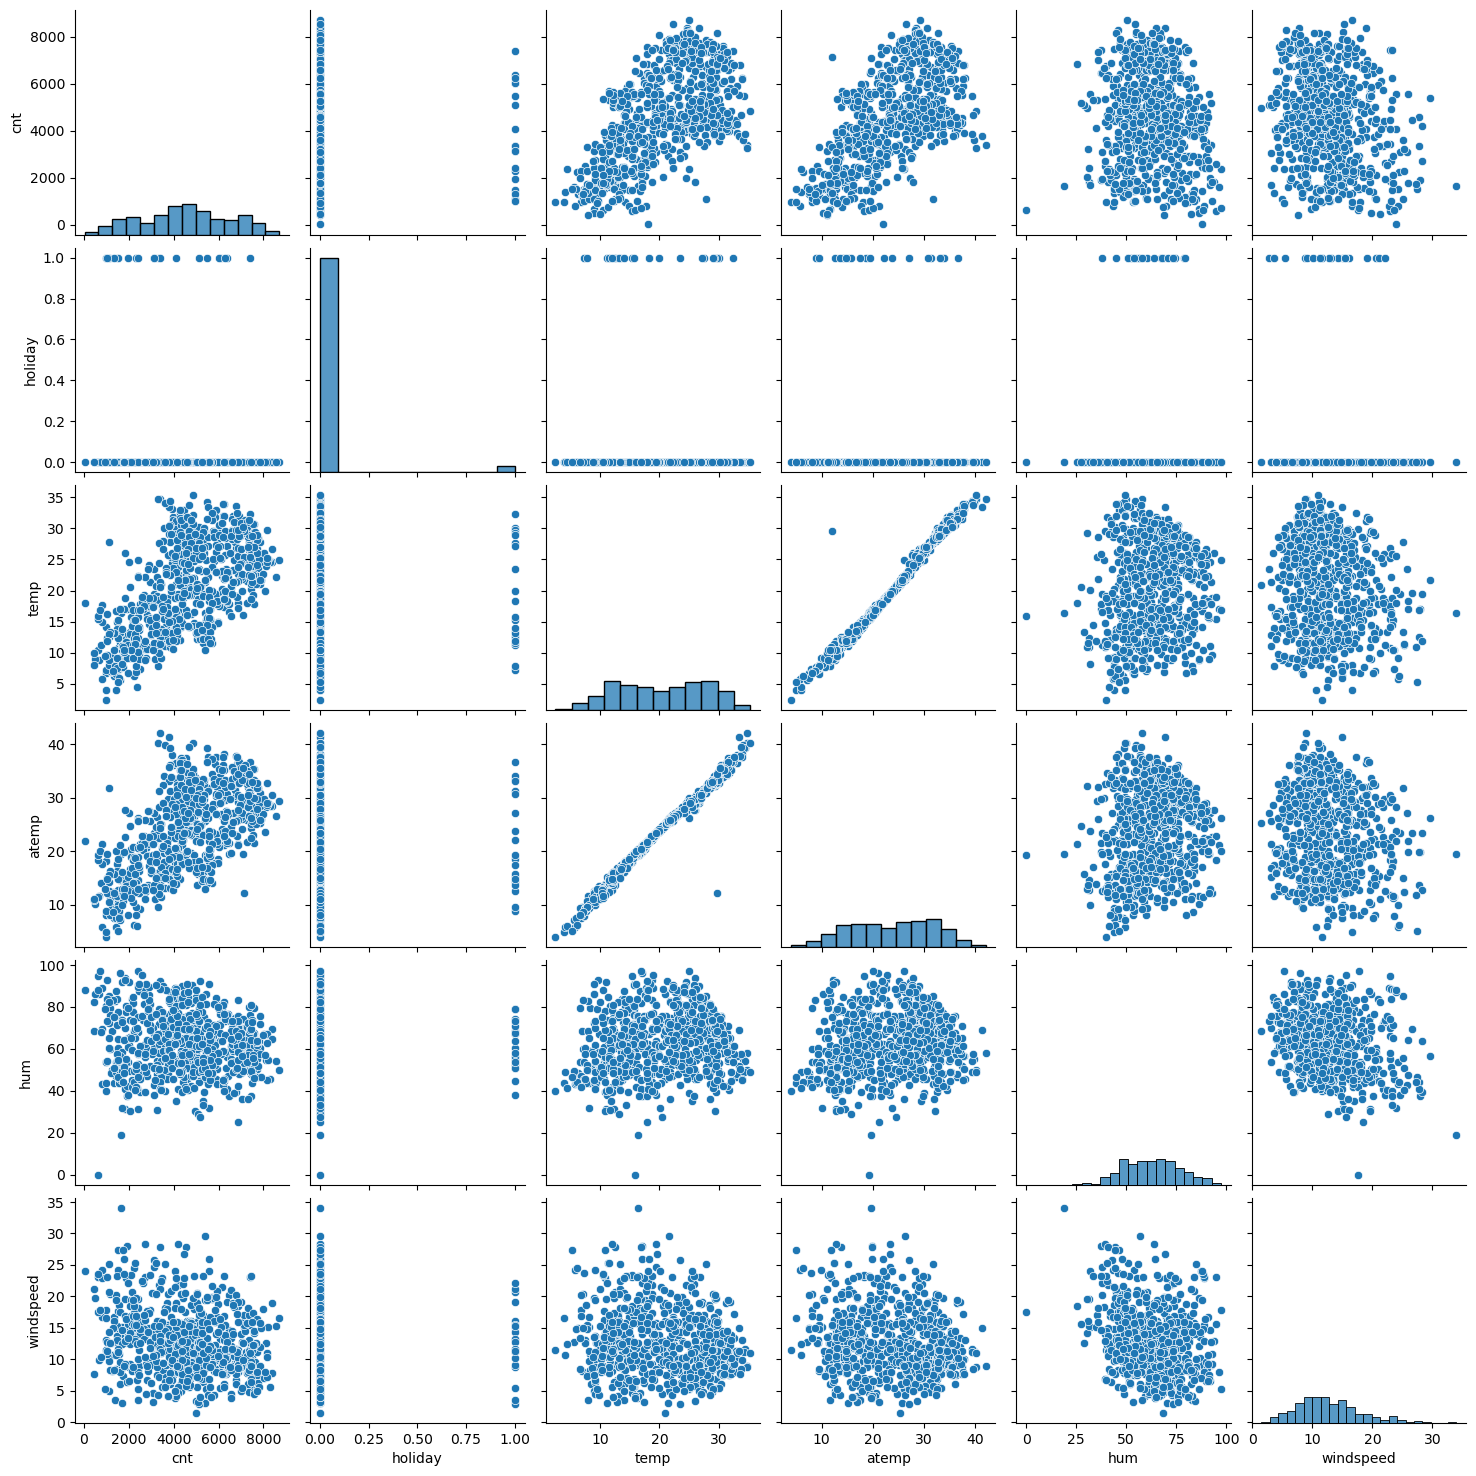

In [34]:
sns.pairplot(df[['cnt','holiday','temp','atemp','hum','windspeed']])
plt.show()

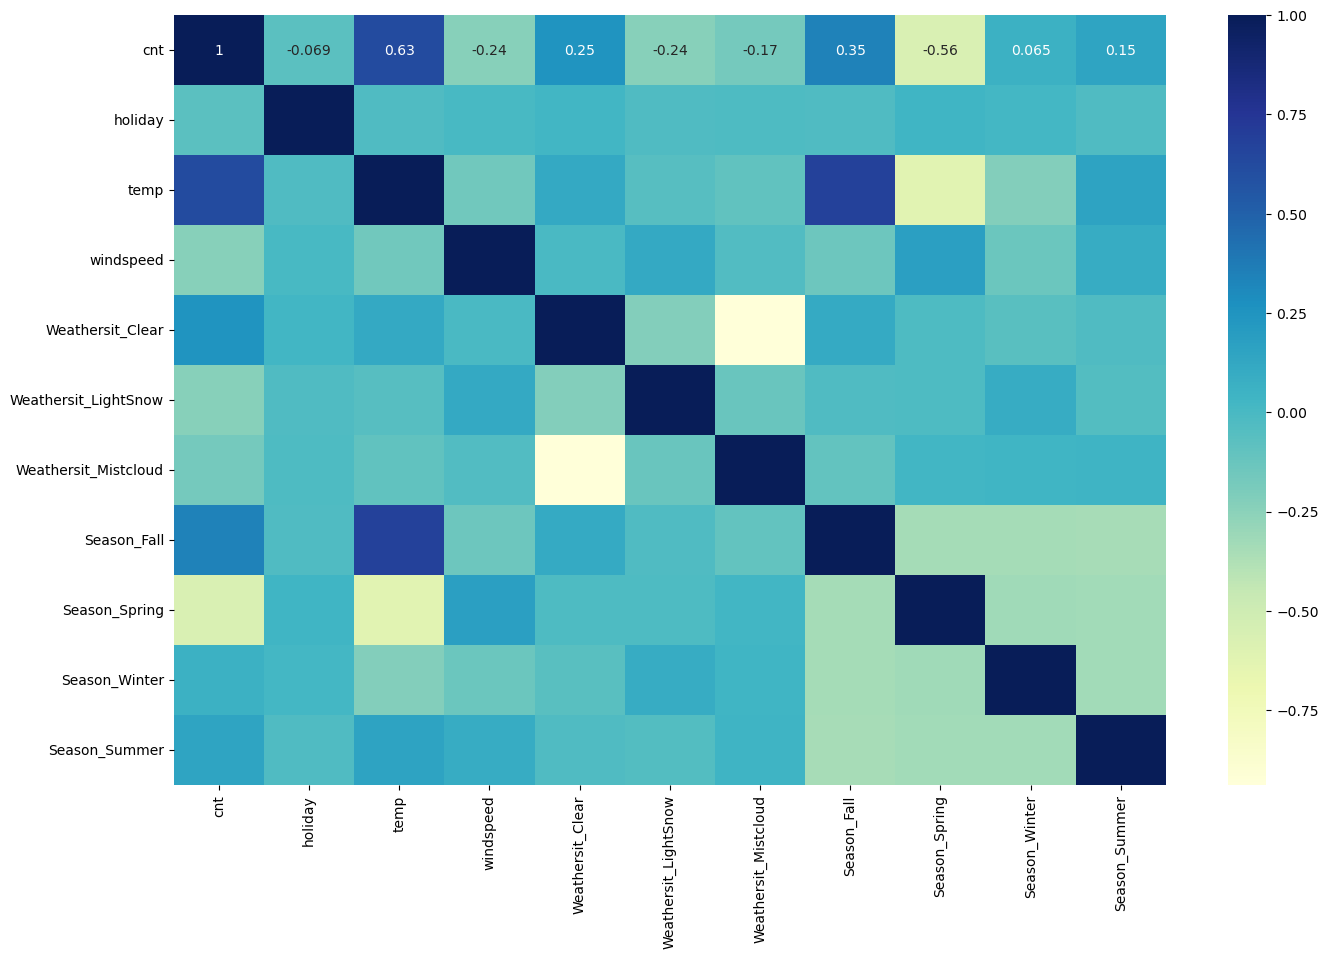

In [35]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df[['cnt','holiday','temp','windspeed','Weathersit_Clear','Weathersit_LightSnow','Weathersit_Mistcloud','Season_Fall','Season_Spring','Season_Winter','Season_Summer']].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Splitting the Data into Training and Testing Sets

In [36]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

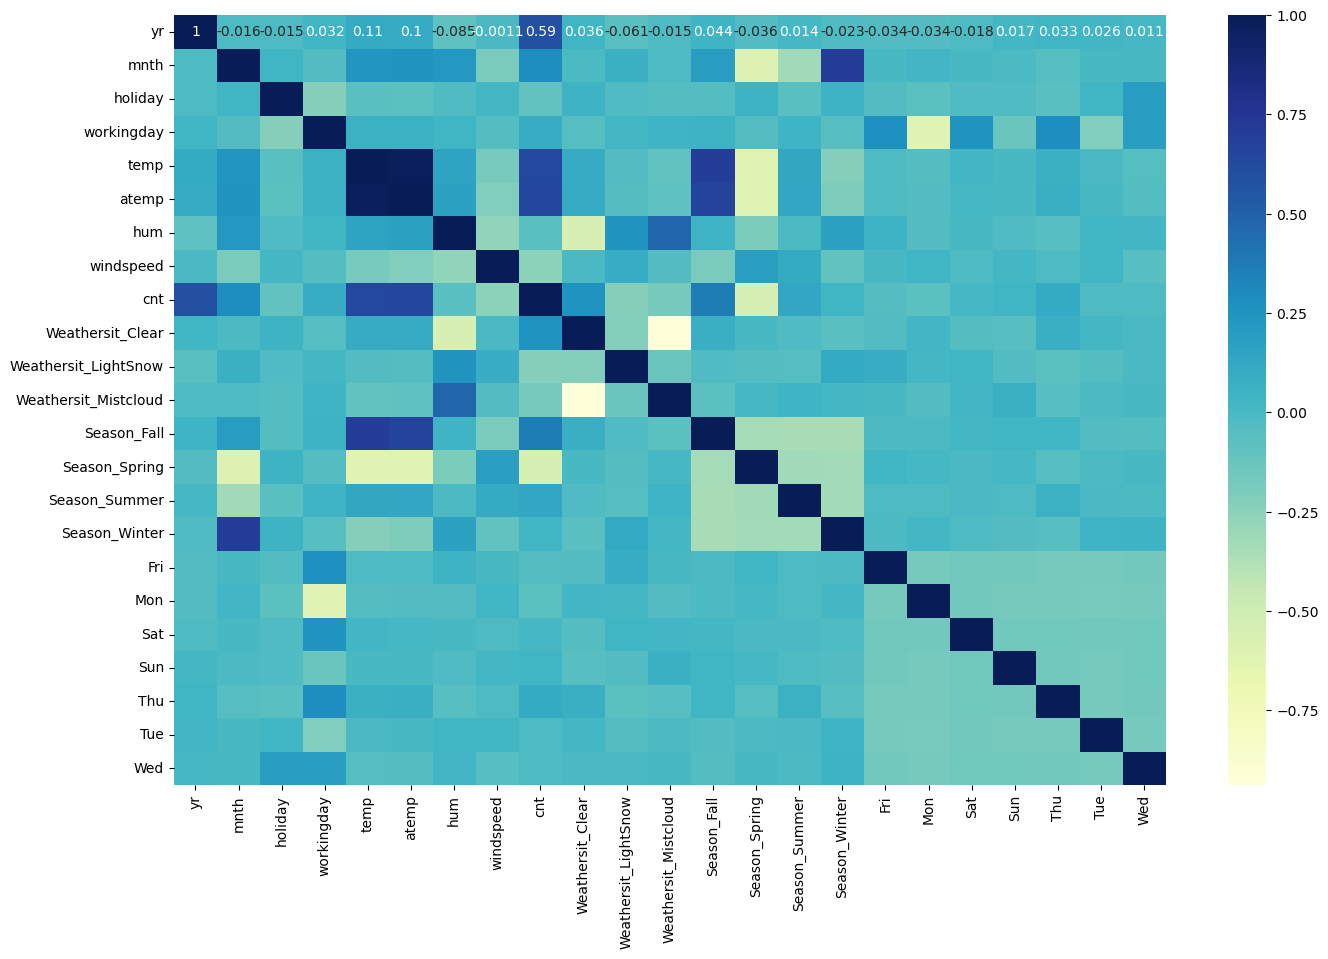

In [37]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [38]:
# Let's check the correlation coefficients to see which variables are highly correlated

print(df_train.corr())


                            yr      mnth   holiday  workingday      temp  \
yr                    1.000000 -0.016067 -0.014980    0.031808  0.107288   
mnth                 -0.016067  1.000000  0.031818   -0.033155  0.239942   
holiday              -0.014980  0.031818  1.000000   -0.233863 -0.066282   
workingday            0.031808 -0.033155 -0.233863    1.000000  0.067787   
temp                  0.107288  0.239942 -0.066282    0.067787  1.000000   
atemp                 0.104206  0.248012 -0.070640    0.067811  0.989537   
hum                  -0.084792  0.227247 -0.029093    0.031989  0.155415   
windspeed            -0.001108 -0.189035  0.017569   -0.043176 -0.187396   
cnt                   0.591508  0.286217 -0.095961    0.092320  0.643517   
Weathersit_Clear      0.036425 -0.010166  0.047427   -0.047424  0.101146   
Weathersit_LightSnow -0.060764  0.076238 -0.028154    0.021159 -0.036093   
Weathersit_Mistcloud -0.015469 -0.016779 -0.038279    0.040766 -0.090161   
Season_Fall 

### Rescaling the Features 

We will use MinMax scaling.

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [40]:
df_train.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'Weathersit_Clear', 'Weathersit_LightSnow',
       'Weathersit_Mistcloud', 'Season_Fall', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,Weathersit_Clear,...,Season_Spring,Season_Summer,Season_Winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,10,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,1,...,0,0,1,0,0,0,0,0,0,1
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,...,0,0,0,0,0,0,0,0,0,1
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,...,1,0,0,0,0,0,1,0,0,0
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,...,1,0,0,0,1,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,...,0,1,0,0,0,0,1,0,0,0


### Dividing into X and Y sets for the model building

In [42]:
y_train = df_train.pop('cnt')
X_train = df_train

In [43]:
df_train.head()


,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,Weathersit_Clear,Weathersit_LightSnow,...,Season_Spring,Season_Summer,Season_Winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,10,0,1,0.509887,0.501133,0.575354,0.300794,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,0,1,0,0,0
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,1,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0,0,...,0,1,0,0,0,0,1,0,0,0


In [44]:
y_train.head()


653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [45]:
X_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,Weathersit_Clear,Weathersit_LightSnow,...,Season_Spring,Season_Summer,Season_Winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,10,0,1,0.509887,0.501133,0.575354,0.300794,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,0,1,0,0,0
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,1,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0,0,...,0,1,0,0,0,0,1,0,0,0


#### Building our model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

#### Before using multiple linear regression, let us try to build a model using 1 variable for comparison

In [46]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [47]:
X_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,Weathersit_Clear,Weathersit_LightSnow,...,Season_Spring,Season_Summer,Season_Winter,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,10,0,1,0.509887,0.501133,0.575354,0.300794,1,0,...,0,0,1,0,0,0,0,0,0,1
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0,0,...,1,0,0,0,0,0,1,0,0,0
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,1,0,...,1,0,0,0,1,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0,0,...,0,1,0,0,0,0,1,0,0,0


#### Model 1 - yr

In [48]:
# Let us try the next best correlated variable with cnt, i.e., year
# Liner regression works on numerical data. Datetime type is not appropriate for this case. You should remove that column after separating it to three separate columns (year, month and day). It is really important to differentiate the data types that you want to use for regression/classification
X_train_1=X_train['yr']

In [49]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_1=sm.add_constant(X_train_1)

In [50]:
lm=sm.OLS(y_train,X_train_1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     273.4
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           1.89e-49
Time:                        13:43:23   Log-Likelihood:                 148.31
No. Observations:                 510   AIC:                            -292.6
Df Residuals:                     508   BIC:                            -284.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3788      0.011     33.108      0.000       0.356       0.401
yr             0.2655      0.016     16.535      0.000       0.234       0.297
==============================================================================
Omnibus:                       27.294   Durbin-Watson:                   1.787
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.137
Skew:                          -0.559   Prob(JB):                     4.71e-07
Kurtosis:                       2.652   Cond. No.                         2.64
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### R square of 0.35 is very less, we are not able to explain relation. We will have to go with mutiple linear regression. 


In [51]:
# also check visually how y train vs y pred looks like
# check for error term distribution
# Making predictions
y_pred = lm.predict(X_train_1)

Text(0, 0.5, 'y_pred')

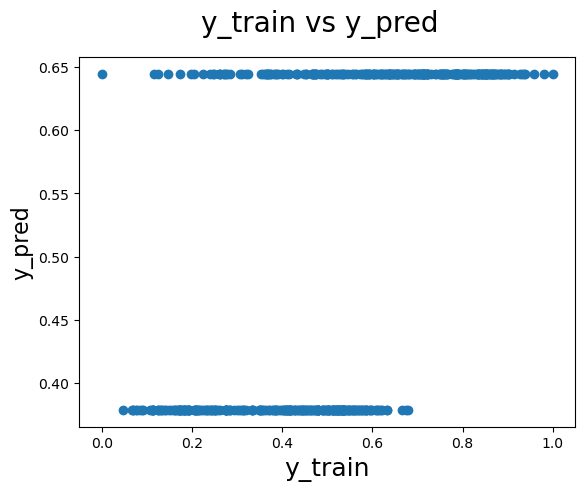

In [52]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0.5, 0, 'Errors')

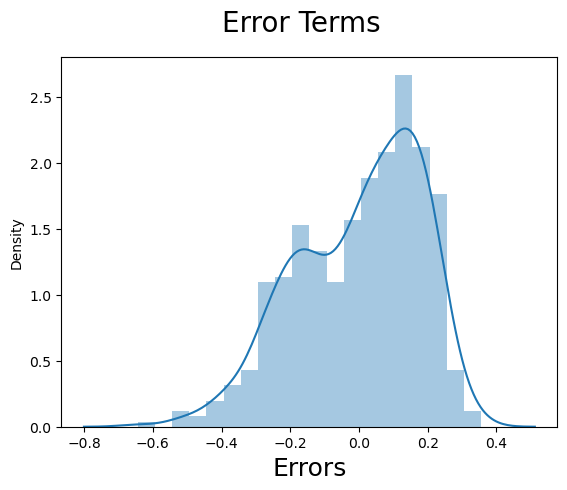

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

##### Mean of Error term is not at 0. We need to make the model better by building multiple linear regresion

#### Model 2 - RFE (Multiple Linear Regression)


In [54]:
# RFE
#Recursive feature elimination
# We need to drop dtype as that is date function, RFE required numerical variables.
# Running RFE with the output number of the variable equal to 20
# We will go with 20 attributes in the model to start with and check 

lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)

rfe = RFE(lm,n_features_to_select=20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [55]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 3),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Weathersit_Clear', True, 1),
 ('Weathersit_LightSnow', True, 1),
 ('Weathersit_Mistcloud', True, 1),
 ('Season_Fall', True, 1),
 ('Season_Spring', True, 1),
 ('Season_Summer', True, 1),
 ('Season_Winter', True, 1),
 ('Fri', True, 1),
 ('Mon', True, 1),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', True, 1),
 ('Tue', True, 1),
 ('Wed', True, 1)]

In [56]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed',
       'Weathersit_Clear', 'Weathersit_LightSnow', 'Weathersit_Mistcloud',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday'], dtype='object')

### Building model using statsmodel, for the detailed statistics

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

# Let us check for VIF to avoid multicollinearity
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     142.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.31e-177
Time:                        13:43:26   Log-Likelihood:                 492.31
No. Observations:                 510   AIC:                            -948.6
Df Residuals:                     492   BIC:                            -872.4
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1168 

,Features,VIF
10,Season_Spring,inf
11,Season_Summer,inf
18,Tue,inf
17,Thu,inf
16,Sun,inf
15,Sat,inf
14,Mon,inf
13,Fri,inf
12,Season_Winter,inf
19,Wed,inf


#### R square adj of 0.83 is good. 


#### VIF for few attributes is coming inf
- If all the independent variables are orthogonal to each other, then VIF = 1.0. If there is perfect correlation, then VIF = infinity. A large value of VIF indicates that there is a correlation between the variables.

##### Let us use RFE=10 attributes and check change in adjusted R square 

#### Model 3
- RFE 10

In [60]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

#rfe = RFE(estimator=LogisticRegression(), n_features_to_select=20)

rfe = RFE(lm,n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [61]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 13),
 ('holiday', True, 1),
 ('workingday', False, 12),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Weathersit_Clear', True, 1),
 ('Weathersit_LightSnow', True, 1),
 ('Weathersit_Mistcloud', True, 1),
 ('Season_Fall', False, 6),
 ('Season_Spring', True, 1),
 ('Season_Summer', False, 2),
 ('Season_Winter', True, 1),
 ('Fri', False, 10),
 ('Mon', False, 5),
 ('Sat', False, 9),
 ('Sun', False, 7),
 ('Thu', False, 8),
 ('Tue', False, 4),
 ('Wed', False, 11)]

In [62]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Weathersit_Clear',
       'Weathersit_LightSnow', 'Weathersit_Mistcloud', 'Season_Spring',
       'Season_Winter'],
      dtype='object')

In [63]:
X_train.columns[~rfe.support_]

Index(['mnth', 'workingday', 'atemp', 'Season_Fall', 'Season_Summer', 'Fri',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [64]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [65]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
print(lm.summary())

#check VIF
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.64e-182
Time:                        13:43:27   Log-Likelihood:                 481.53
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     500   BIC:                            -900.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1780 

,Features,VIF
5,Weathersit_Clear,37.29
7,Weathersit_Mistcloud,26.16
6,Weathersit_LightSnow,3.73
2,temp,2.59
8,Season_Spring,2.52
3,hum,1.85
9,Season_Winter,1.77
4,windspeed,1.16
0,yr,1.03
1,holiday,1.01



##### VIF of Weathersit_Clear is high, we will drop this 
##### We will drop one attribute at a time and rebuild model

#### Model 4 - drop Weathersit Clear

In [66]:
X_train_new1 = X_train_new.drop(["Weathersit_Clear"], axis = 1)

In [67]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train,X_train_lm).fit()
#Let's see the summary of our linear model
print(lm.summary())

# check VIF
#X_train_new1 = X_train_new1.drop(['const'], axis=1)
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.64e-182
Time:                        13:43:28   Log-Likelihood:                 481.53
No. Observations:                 510   AIC:                            -943.1
Df Residuals:                     500   BIC:                            -900.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.3382 

,Features,VIF
3,hum,21.58
2,temp,12.97
4,windspeed,3.94
7,Season_Spring,2.51
6,Weathersit_Mistcloud,2.23
8,Season_Winter,2.09
0,yr,2.05
5,Weathersit_LightSnow,1.20
1,holiday,1.04


##### After dropping Weathersit_Clear, R square remains healthy at 0.82
##### Let us check for VIF again for remaining attributes in the model

## Model 5 - final
#### VIF for hum is very high. Drop and rebuild

In [68]:
X_train_new2 = X_train_new1.drop(["hum"], axis = 1)

# Adding a constant variable
X_train_lm=sm.add_constant(X_train_new2)
lm = sm.OLS(y_train,X_train_lm).fit()
print(lm.summary())


# Calculate the VIFs for the new model
#X_train_new2 = X_train_new2.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.62e-181
Time:                        13:43:28   Log-Likelihood:                 476.25
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -896.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2684 

,Features,VIF
3,windspeed,3.91
2,temp,3.53
0,yr,2.05
6,Season_Spring,1.64
5,Weathersit_Mistcloud,1.49
7,Season_Winter,1.37
4,Weathersit_LightSnow,1.08
1,holiday,1.04


#### Adjusted R square of 0.817 is good
All p values are significant
##### All vif values are below 5
##### Model looks good with 8 attributes



In [69]:
lm.params

const                   0.268413
yr                      0.234892
holiday                -0.089237
temp                    0.421351
windspeed              -0.145224
Weathersit_LightSnow   -0.282103
Weathersit_Mistcloud   -0.075904
Season_Spring          -0.119051
Season_Winter           0.046938
dtype: float64

In [70]:
# Making predictions
y_pred = lm.predict(X_train_lm)


Text(0, 0.5, 'y_pred')

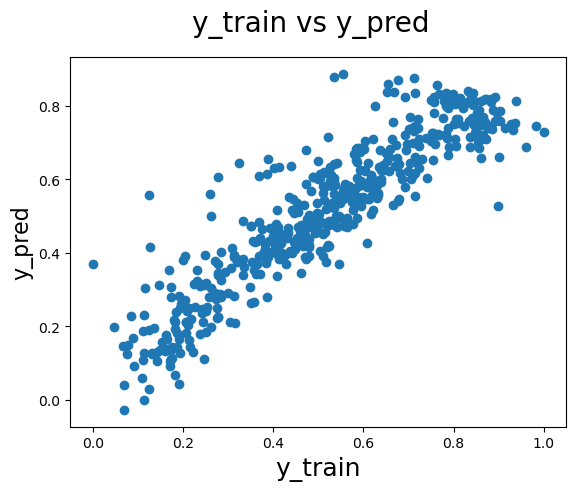

In [71]:

# Plotting y_train and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_pred)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)   

Text(0.5, 0, 'Errors')

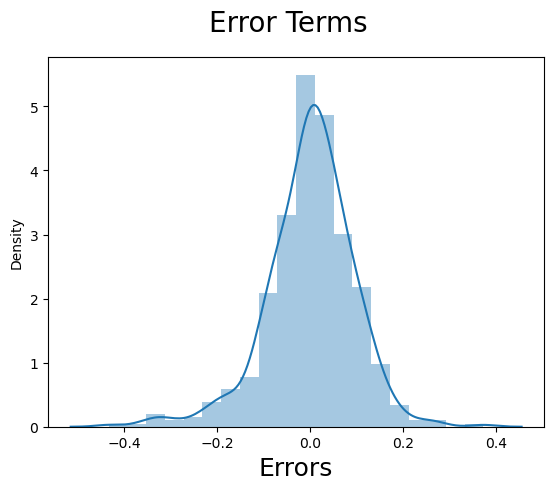

In [72]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

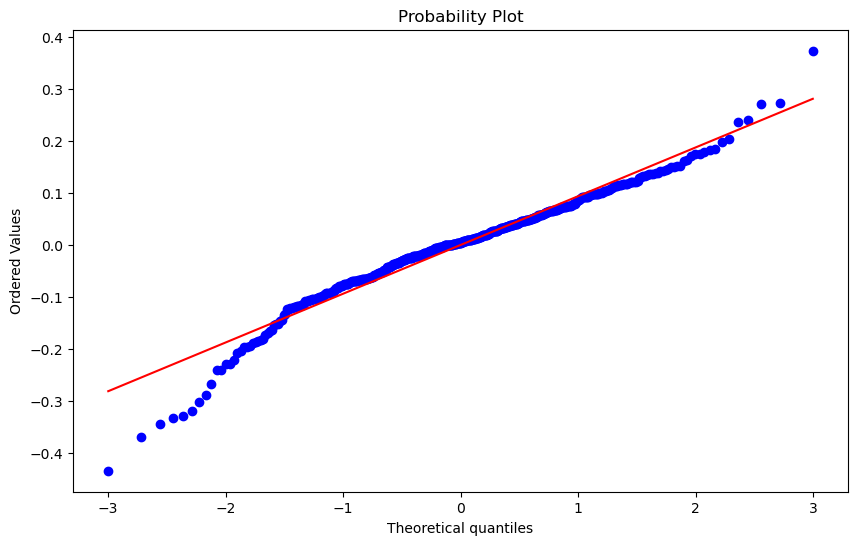

In [73]:
# Q Q plot
from scipy import stats
fig = plt.figure(figsize=(10, 6))
stats.probplot(y_train-y_pred, dist='norm', plot=plt)
plt.show()

## Model Test data based on model 5 
- Making Predictions on test dataset
- Applying the scaling on the test sets

In [74]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [75]:
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [77]:
X_test_new.head()

,const,yr,holiday,temp,hum,windspeed,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Spring,Season_Winter
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,1,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0


In [78]:
X_test_new.head()

,const,yr,holiday,temp,hum,windspeed,Weathersit_Clear,Weathersit_LightSnow,Weathersit_Mistcloud,Season_Spring,Season_Winter
184,1.0,0,1,0.831783,0.657364,0.084219,0,0,1,0,0
535,1.0,1,0,0.901354,0.610133,0.153728,1,0,0,0,0
299,1.0,0,0,0.511964,0.837699,0.334206,0,0,1,0,1
221,1.0,0,0,0.881625,0.437098,0.339570,1,0,0,0,0
152,1.0,0,0,0.817246,0.314298,0.537414,1,0,0,0,0


In [79]:
lm.params

const                   0.268413
yr                      0.234892
holiday                -0.089237
temp                    0.421351
windspeed              -0.145224
Weathersit_LightSnow   -0.282103
Weathersit_Mistcloud   -0.075904
Season_Spring          -0.119051
Season_Winter           0.046938
dtype: float64

In [80]:
X_test_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed',
       'Weathersit_Clear', 'Weathersit_LightSnow', 'Weathersit_Mistcloud',
       'Season_Spring', 'Season_Winter'],
      dtype='object')

In [81]:
X_test_new=X_test_new[['const','yr','holiday','temp','windspeed','Weathersit_LightSnow','Weathersit_Mistcloud','Season_Spring','Season_Winter']]

In [82]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model 5 Evaluation on test dataset 
- test data evaluation

Text(0, 0.5, 'y_pred')

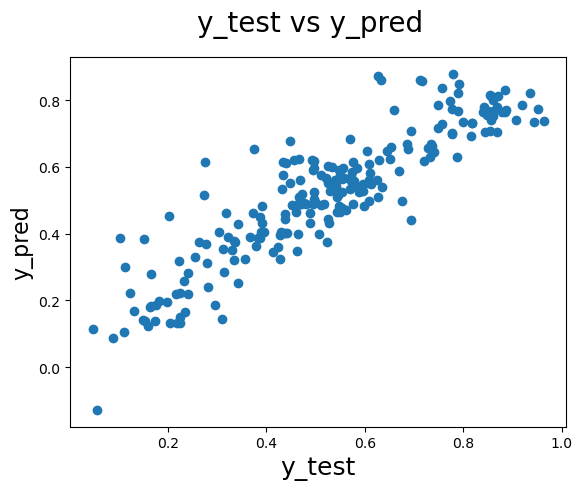

In [83]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [84]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     285.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.62e-181
Time:                        13:43:31   Log-Likelihood:                 476.25
No. Observations:                 510   AIC:                            -934.5
Df Residuals:                     501   BIC:                            -896.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2684 

#### Model 5 evaluation 
Adj R Square
- Train dataset = 0.817
- Test dataset =  0.817

In [85]:
y_test.info()

<class 'pandas.core.series.Series'>
Index: 219 entries, 184 to 72
Series name: cnt
Non-Null Count  Dtype  
--------------  -----  
219 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


In [86]:
y_pred.info()

<class 'pandas.core.series.Series'>
Index: 219 entries, 184 to 72
Series name: None
Non-Null Count  Dtype  
--------------  -----  
219 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


Text(0, 0.5, 'y_pred_values')

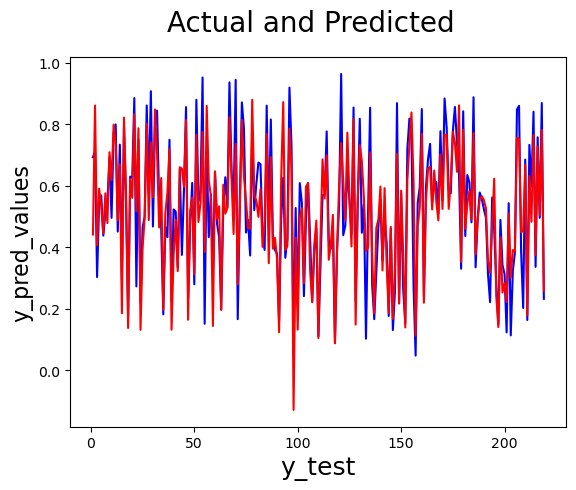

In [87]:
#Actual vs Predicted
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=1.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=1.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                               # X-label
plt.ylabel('y_pred_values', fontsize=16)    

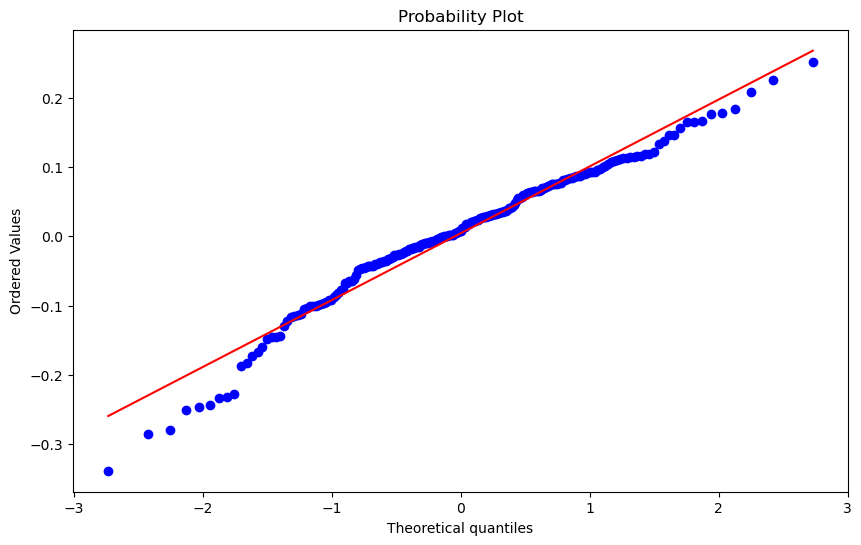

In [88]:
# Q Q plot
from scipy import stats
fig = plt.figure(figsize=(10, 6))
stats.probplot(y_test-y_pred, dist='norm', plot=plt)
plt.show()

Text(0, 0.5, 'Cnt-Predicted_cnt')

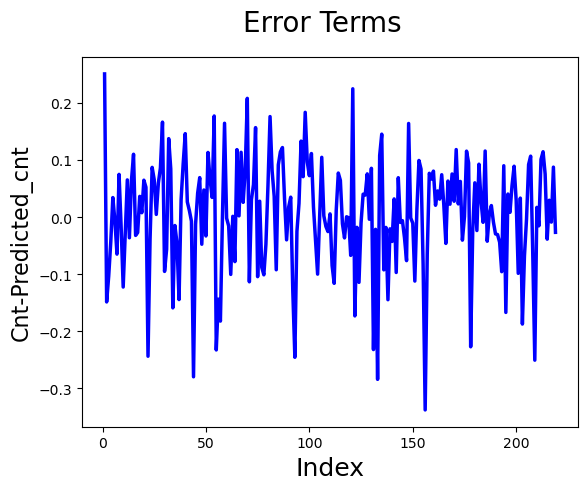

In [89]:
# Error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('Cnt-Predicted_cnt', fontsize=16)     

#### r2score to be added

In [90]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8014591758694877